In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import matplotlib.pyplot as plt

In [3]:
!unzip /content/drive/MyDrive/neural_networks_2/pics.zip -q

Streaming output truncated to the last 5000 lines.
  inflating: pics/5499.jpg           
  inflating: pics/55.jpg             
  inflating: pics/550.jpg            
  inflating: pics/5500.jpg           
  inflating: pics/5501.jpg           
  inflating: pics/5502.jpg           
  inflating: pics/5503.jpg           
  inflating: pics/5504.jpg           
  inflating: pics/5505.jpg           
  inflating: pics/5506.jpg           
  inflating: pics/5507.jpg           
  inflating: pics/5508.jpg           
  inflating: pics/5509.jpg           
  inflating: pics/551.jpg            
  inflating: pics/5510.jpg           
  inflating: pics/5511.jpg           
  inflating: pics/5512.jpg           
  inflating: pics/5513.jpg           
  inflating: pics/5514.jpg           
  inflating: pics/5515.jpg           
  inflating: pics/5516.jpg           
  inflating: pics/5517.jpg           
  inflating: pics/5518.jpg           
  inflating: pics/5519.jpg           
  inflating: pics/552.jpg            

In [4]:
data = pd.read_csv('/content/drive/MyDrive/neural_networks_2/desc.csv')

In [5]:
data

,image_id,street,city,n_city,bed,bath,sqft,price
0,0,1317 Van Buren Avenue,"Salton City, CA",317,3,2.0,1560,201900
1,1,124 C Street W,"Brawley, CA",48,3,2.0,713,228500
2,2,2304 Clark Road,"Imperial, CA",152,3,1.0,800,273950
3,3,755 Brawley Avenue,"Brawley, CA",48,3,1.0,1082,350000
4,4,2207 R Carrillo Court,"Calexico, CA",55,4,3.0,2547,385100
...,...,...,...,...,...,...,...,...
15469,15469,4156 Sterlingview Drive,"Moorpark, CA",227,5,4.1,4092,949000
15470,15470,4355 Avenida Prado,"Thousand Oaks, CA",372,5,3.0,2773,949900
15471,15471,12717 Koenigstein Rd Road,"Santa Paula, CA",338,3,2.0,1576,920000
15472,15472,36 Kunkle Street,"Oak View, CA",253,4,2.0,2086,997000


In [32]:
tabular = data[['street','city','n_city','bed','bath','sqft']].copy()
tabular_y = data['price'].copy()

In [17]:
tabular

,street,city,n_city,bed,bath,sqft
0,1317 Van Buren Avenue,"Salton City, CA",317,3,2.0,1560
1,124 C Street W,"Brawley, CA",48,3,2.0,713
2,2304 Clark Road,"Imperial, CA",152,3,1.0,800
3,755 Brawley Avenue,"Brawley, CA",48,3,1.0,1082
4,2207 R Carrillo Court,"Calexico, CA",55,4,3.0,2547
...,...,...,...,...,...,...
15469,4156 Sterlingview Drive,"Moorpark, CA",227,5,4.1,4092
15470,4355 Avenida Prado,"Thousand Oaks, CA",372,5,3.0,2773
15471,12717 Koenigstein Rd Road,"Santa Paula, CA",338,3,2.0,1576
15472,36 Kunkle Street,"Oak View, CA",253,4,2.0,2086


In [23]:
tabular['city'].value_counts()

San Diego, CA         707
Los Angeles, CA       388
Lancaster, CA         312
La Quinta, CA         305
Riverside, CA         274
                     ... 
Rimforest, CA           1
Blue Jay, CA            1
Westchester, CA         1
West Hollywood, CA      1
Romoland, CA            1
Name: city, Length: 415, dtype: int64

In [24]:
tabular['n_city'].value_counts()

320    707
207    388
193    312
175    305
310    274
      ... 
41       1
95       1
399      1
382      1
195      1
Name: n_city, Length: 415, dtype: int64

we have 415 different cities

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


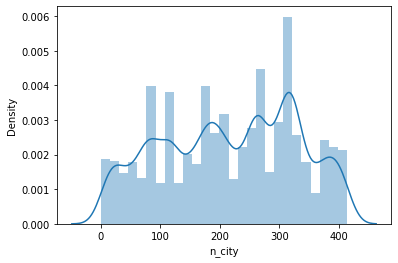

In [31]:
#distibution of cities in data
sns.distplot(tabular['n_city'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


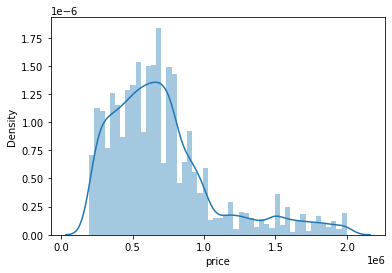

In [33]:
#distibution of household price in data
sns.distplot(tabular_y)

In [19]:
def get_state(city_text):
    index = city_text.find(',')
    return city_text[index+2:]
tabular['city'].apply(get_state).value_counts()

CA    15474
Name: city, dtype: int64

all cities are in california

In [34]:
tabular['bath'] = tabular['bath'].apply(lambda x: int(x) + (x-int(x))*5 )

In [39]:
def get_street(street_text):
  return ' '.join(street_text.split()[1:])
tabular['street'] = tabular['street'].apply(get_street)

In [42]:
tabular['street'].value_counts()

not provided           23
Avenida Majorca        17
Calle Aragon           16
Avenida Castilla       12
Woodland Drive         12
                       ..
Boulder Estates Way     1
Rouge Lane              1
Doheney Court           1
Majella Avenue          1
Madera De Playa         1
Name: street, Length: 10467, dtype: int64

for now we leave street and city features

In [44]:
tabular.drop(columns=['street','city'],inplace=True)

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(tabular)
y = scaler.fit_transform(data[['price']])
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True)

In [82]:
y

array([[-1.32962557],
       [-1.2590618 ],
       [-1.13849325],
       ...,
       [ 0.57533101],
       [ 0.77959456],
       [ 0.72123354]])

In [43]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D,AveragePooling2D, Flatten, Dense, Dropout, Activation , Concatenate, Input , BatchNormalization,Lambda
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import Model
from tensorflow.image import rgb_to_grayscale
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
from tensorflow.keras import activations

In [63]:
input_model = Input((X_train.shape[1]),name = 'input_layer')
model1 = Dense(units = 32, activation = 'relu')(input_model)
model1 = Dense(units = 16, activation = 'relu')(model1)
model1 = Dense(units = 8, activation = 'relu')(model1)
output = Dense(units = 1, activation = 'linear' , name='regres')(model1)

baseline_model = Model(inputs= [input_model], outputs=[output])
baseline_model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 4)]               0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                160       
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 136       
_________________________________________________________________
regres (Dense)               (None, 1)                 9         
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


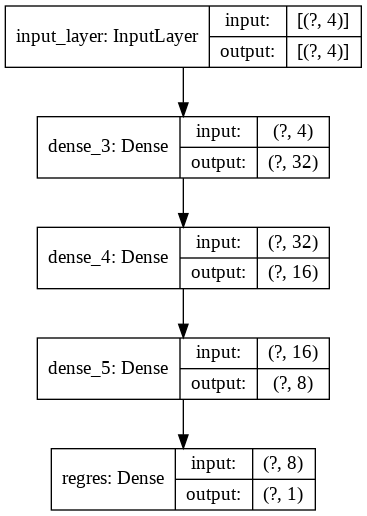

In [64]:
plot_model(baseline_model,show_shapes=True)

In [85]:
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=10)
checkpointer = ModelCheckpoint('./tabular_model_weights.hdf5', 
                               monitor = 'val_mae',
                               verbose=1, 
                               save_best_only=True)
baseline_model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])

In [86]:
baseline_model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=100,verbose=1,batch_size=32,shuffle=True, callbacks=[es , checkpointer])

Epoch 1/100
335/387 [========================>.....] - ETA: 0s - loss: 115.0006 - mae: 5.7760
Epoch 00001: val_mae improved from inf to 16.37837, saving model to ./tabular_model_weights.hdf5
387/387 [==============================] - 1s 1ms/step - loss: 115.0477 - mae: 5.8265 - val_loss: 398.4195 - val_mae: 16.3784
Epoch 2/100
347/387 [=========================>....] - ETA: 0s - loss: 108.4297 - mae: 5.8304
Epoch 00002: val_mae improved from 16.37837 to 12.39863, saving model to ./tabular_model_weights.hdf5
387/387 [==============================] - 0s 1ms/step - loss: 107.7536 - mae: 5.8544 - val_loss: 221.9429 - val_mae: 12.3986
Epoch 3/100
334/387 [========================>.....] - ETA: 0s - loss: 106.4553 - mae: 5.2966
Epoch 00003: val_mae improved from 12.39863 to 0.82308, saving model to ./tabular_model_weights.hdf5
387/387 [==============================] - 0s 1ms/step - loss: 115.6179 - mae: 5.2984 - val_loss: 1.4332 - val_mae: 0.8231
Epoch 4/100
352/387 [======================

In [87]:
#0.6 mean absoulte error is not efficient enough for us and it's actually quite large

In [ ]:
#resizing images to (50,50)
import scipy
new_shape = (50,50,3)
X_train_new = np.empty(shape=(X_train.shape[0],)+new_shape)
for idx in range(X_train.shape[0]):
    X_train_new[idx] = scipy.misc.imresize(X_train[idx], new_shape)
